# Cellular Automata

- **Created by Andrés Segura Tinoco**
- **Created on Jul 08, 2019**

## Intro
A cellular automaton (abbrev. CA) is a discrete model studied in computer science, mathematics, physics, complexity science, theoretical biology and microstructure modeling.

A cellular automaton consists of a regular grid of cells, each in one of a finite number of states, such as on and off. The grid can be in any finite number of dimensions. For each cell, a set of cells called its neighborhood is defined relative to the specified cell. An initial state (time t = 0) is selected by assigning a state for each cell. A new generation is created (advancing t by 1), according to some fixed rule (generally, a mathematical function) that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. Typically, the rule for updating the state of cells is the same for each cell and does not change over time, and is applied to the whole grid simultaneously, though exceptions are known, such as the stochastic cellular automaton and asynchronous cellular automaton.

In [1]:
# Import Python libraries
import numpy as np
import matplotlib.pyplot as plt

## 1. Linear Cellular Automata (LCA)

### Circular loop through an Automaton

In [2]:
# Get automata cells 
def get_cells_range(automaton, ix_start, ix_end, ix_max):
    cells = ''
    for i in range(ix_start, ix_end + 1):
        ix = i % ix_max
        cells += str(automaton[ix])
    return cells

In [3]:
# Test get_cells_range function
automaton = [0, 2, 0, 0, 1, 0, 0, 3, 1]
n_cell = len(automaton)
r = 1
for i in range(n_cell):
    ix_start = i - r
    ix_end = i + r
    print('(', ix_start, ',', ix_end, ') =', get_cells_range(automaton, ix_start, ix_end, n_cell))

( -1 , 1 ) = 102
( 0 , 2 ) = 020
( 1 , 3 ) = 200
( 2 , 4 ) = 001
( 3 , 5 ) = 010
( 4 , 6 ) = 100
( 5 , 7 ) = 003
( 6 , 8 ) = 031
( 7 , 9 ) = 310


### Apply evolution rule: 30

In [4]:
# Evolve the LCA
def evolve_lca_automaton(init_state, max_gen, rule, r):
    universe = [init_state]
    n_cell = len(init_state)
    
    for g in range(max_gen):
        new_automaton = []
        automaton = universe[g]
        
        for i in range(n_cell):
            ix_start = i - r
            ix_end = i + r
            gen = get_cells_range(automaton, ix_start, ix_end, n_cell)
            cell = rule[gen]
            new_automaton.append(cell)
        universe.append(new_automaton)
    
    return universe

In [5]:
# Creates a LCA rule
def create_lca_rule(byte, b_size = 8):
    rule = {}
    bits = bin(byte)[2:].zfill(b_size)
    
    for i in range(0, b_size):
        bin_key = bin(i)[2:].zfill(3)
        bin_value = bits[(b_size - i - 1)]
        rule[bin_key] = int(bin_value)
    
    return rule;

In [6]:
# Rule: bin(30) = 00011110
rule = create_lca_rule(30)
rule

{'000': 0,
 '001': 1,
 '010': 1,
 '011': 1,
 '100': 1,
 '101': 0,
 '110': 0,
 '111': 0}

In [7]:
# Initial state of cellular automaton
n_cell = 43
init_state = list(np.zeros(n_cell).astype(int))
init_state[n_cell // 2] = 1

In [8]:
# Evolve the linear cellular automaton
max_generations = 21
r = 1
universe = evolve_lca_automaton(init_state, max_generations, rule, r)

In [9]:
# Plot the Automaton evolution
def plot_automata(universe):
    fig, ax = plt.subplots(figsize = (12, 12))
    ax.set_title("Automaton Evolution ", fontsize = 20)
    plt.imshow(universe, cmap='Greys',  interpolation='nearest')
    plt.xlabel("Cells", fontsize = 11)
    plt.ylabel("Generations", fontsize = 11)
    plt.show()

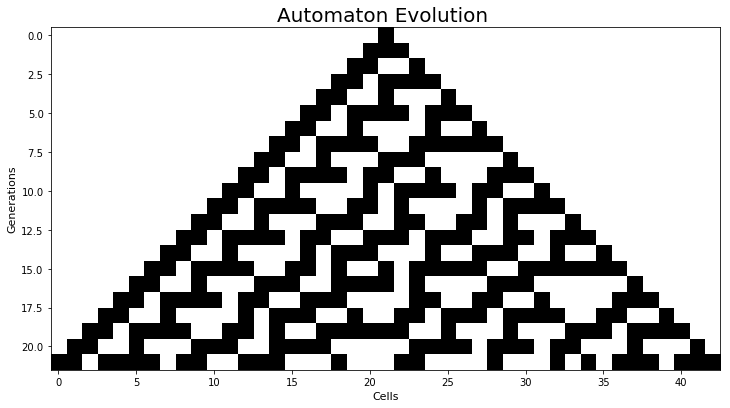

In [10]:
# Plotting automaton
plot_automata(universe)

### Apply evolution rule: 90

In [11]:
# Rule: bin(90) = 01011010
rule = create_lca_rule(90)
rule

{'000': 0,
 '001': 1,
 '010': 0,
 '011': 1,
 '100': 1,
 '101': 0,
 '110': 1,
 '111': 0}

In [12]:
# Initial state of the linear cellular automaton
n_cell = 257
init_state = list(np.zeros(n_cell).astype(int))
init_state[n_cell // 2] = 1

In [13]:
# Evolve the linear cellular automaton
max_generations = 128
r = 1
universe = evolve_lca_automaton(init_state, max_generations, rule, r)

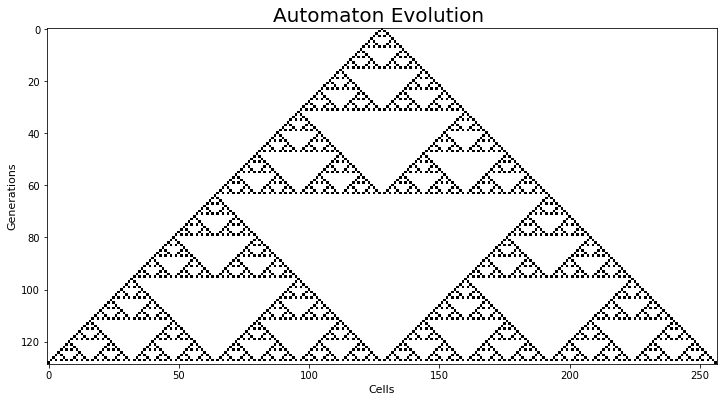

In [14]:
# Plotting automaton
plot_automata(universe)

## 2. Reversible Linear Cellular Automata (RLCA)

#### Util Functions: converts byte list to binary string and vice versa

In [15]:
# Convert a byte list to a bits string
def byte_list_to_bit_string(byte_list):
    bit_string = ''
    for byte in byte_list:
        bit_string += bin(byte)[2:].zfill(8)
    return bit_string

# Convert a bits string to a byte list
def bit_string_to_byte_list(bit_string):
    byte_list = []
    n = len(bit_string) // 8
    for i in range(n):
        ix_start = i * 8
        ix_end = 8 + i * 8
        byte = bit_string[ix_start:ix_end]
        byte_list.append(int(byte, 2))
    return byte_list

# Update a string by index
def update_string(s, i, v):
    ns = s[:i] + v + s[i+1:]
    return ns

#### Reversible Linear Cellular Automata functions

**Totalistic:** A special class of cellular automata are totalistic cellular automata. The state of each cell in a totalistic cellular automaton is represented by a number (usually an integer value drawn from a finite set), and the value of a cell at time t depends only on the sum of the values of the cells in its neighborhood (possibly including the cell itself) at time t − 1

In [16]:
# Creates a RLCA totalistic rule
def create_rlca_rule(byte, r = 2):
    rule = {}
    r_size = 2 * r + 1
    bits = bin(byte)[2:].zfill(r_size)
    b_size = len(bits)
    
    for i in range(0, b_size):
        bin_value = bits[(b_size - i - 1)]
        rule[i] = int(bin_value)
    
    return rule

In [17]:
# Get automata cells value
def get_cells_value(automaton, ix, r, n):
    value = 0
    ix_start = max(ix - r, 0)
    ix_end = min(ix + r + 1, n)
    
    for i in range(ix_start, ix_end):
        if i != ix:
            value += int(automaton[i])
    
    return value

In [18]:
# Apply Linear Cellular Automata rule to current automaton
def apply_lca_rule(automaton, rule, r, forward):
    n_cell = len(automaton)
    new_automaton = []
    curr_bit_string = (automaton + '.')[:-1]
    
    if forward:
        curr_range = range(0, n_cell, 1)
    else:
        curr_range = range(n_cell - 1, -1, -1)
    
    for i in curr_range:
        gen_ix = get_cells_value(curr_bit_string, i, r, n_cell)
        cell = rule[gen_ix]
        new_cell = str(int(not(int(curr_bit_string[i]) ^ cell)))
        
        if new_cell != curr_bit_string[i]:
            curr_bit_string = update_string(curr_bit_string, i, new_cell)
    
    # Code new automaton and return it
    new_automaton = bit_string_to_byte_list(curr_bit_string)
    return new_automaton

In [19]:
# Evolve the RLCA
def evolve_rlca_automaton(init_state, max_gen, rule, r, forward):
    universe = [init_state]
    n_cell = len(init_state)
    
    for g in range(max_gen):
        automaton = universe[g]
        automaton_bits = byte_list_to_bit_string(automaton)
        new_automaton = apply_lca_rule(automaton_bits, key, r, forward)
        universe.append(new_automaton)
    
    return universe

### Run RLCA: Forward way

In [20]:
# Evolution params
max_generations = 128
r = 3

In [21]:
# Totalistic Rule: bin(19) = 0001110
key = create_rlca_rule(14, r)
key

{0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0}

In [22]:
# Initial state of the linear cellular automaton
n_cell = 257
init_state = list(np.zeros(n_cell).astype(int))
init_state[n_cell // 2] = 1

In [23]:
# Evolve the reversible linear cellular automata
forward = True
universe = evolve_rlca_automaton(init_state, max_generations, rule, r, forward)

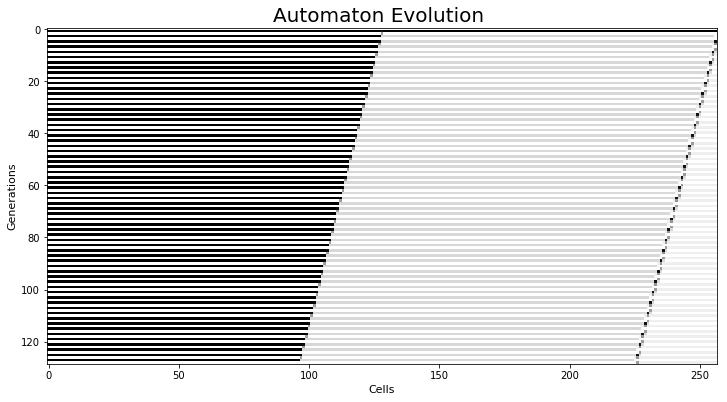

In [24]:
# Plotting RLCA
plot_automata(universe)

### Run RLCA: Backward way

In [25]:
# Initial state of the linear cellular automaton
init_state2 = universe[max_generations - 1]

In [26]:
# Evolve the reversible linear cellular automata
forward = False
universe2 = evolve_rlca_automaton(init_state2, max_generations, rule, r, forward)

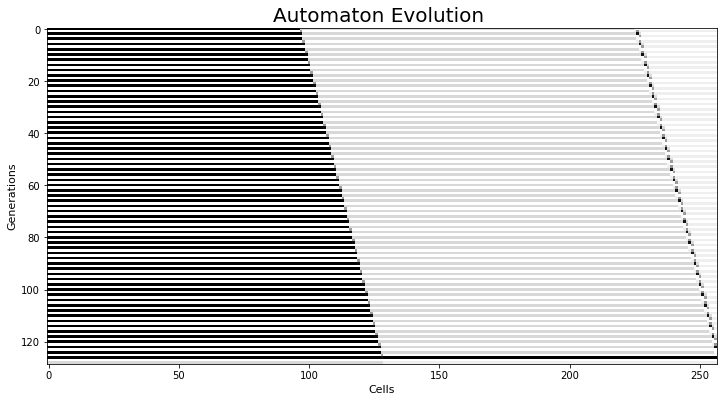

In [27]:
# Plotting RLCA
plot_automata(universe2)

### Validation of the Reversibility of the Automata

In [28]:
universe[0] == universe2[max_generations - 1]

True

<hr>
<p><a href="https://ansegura7.github.io/Algorithms/">« Home</a></p>